# Import Packages

In [50]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [51]:
%pip install mlflow dagshub

In [52]:
import dagshub
dagshub.init(repo_owner='himanshu1703', repo_name='swiggy-delivery-time-prediction', mlflow=True)

Initialized MLflow to track repo "himanshu1703/swiggy-delivery-time-prediction"

Repository himanshu1703/swiggy-delivery-time-prediction initialized!

In [53]:
import mlflow

In [54]:
# set the tracking server

mlflow.set_tracking_uri("https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow")

In [55]:
# mlflow experiment

mlflow.set_experiment("Exp 2 - Model Selection")

<Experiment: artifact_location='mlflow-artifacts:/f94207bd11ac418fb8cf73d11907465d', creation_time=1732858353307, experiment_id='1', last_update_time=1732858353307, lifecycle_stage='active', name='Exp 2 - Model Selection', tags={}>

In [56]:
from sklearn import set_config

set_config(transform_output="pandas")

# Load the Data

In [57]:
# load the data

df = pd.read_csv('swiggy.csv')

df

ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0      0x4607     INDORES13DEL02                   37                     4.9   
1      0xb379     BANGRES18DEL02                   34                     4.5   
2      0x5d6d     BANGRES19DEL01                   23                     4.4   
3      0x7a6a    COIMBRES13DEL02                   38                     4.7   
4      0x70a2     CHENRES12DEL01                   32                     4.6   
...        ...                ...                 ...                     ...   
45588  0x7c09      JAPRES04DEL01                   30                     4.8   
45589  0xd641      AGRRES16DEL01                   21                     4.6   
45590  0x4f8d     CHENRES08DEL03                   30                     4.9   
45591  0x5eee    COIMBRES11DEL01                   20                     4.7   
45592  0x5fb2   RANCHIRES09DEL02                   23                     4.9   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
45588            26.902328             75.794257                   26.912328   
45589             0.000000              0.000000                    0.070000   
45590            13.022394             80.242439                   13.052394   
45591            11.001753             76.986241                   11.041753   
45592            23.351058             85.325731                   23.431058   

       Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                        75.912471  19-03-2022    11:30:00          11:45:00   
1                        77.813237  25-03-2022    19:45:00          19:50:00   
2                        77.688400  19-03-2022    08:30:00          08:45:00   
3                        77.026494  05-04-2022    18:00:00          18:10:00   
4                        80.289982  26-03-2022    13:30:00          13:45:00   
...                            ...         ...         ...               ...   
45588                    75.804257  24-03-2022    11:35:00          11:45:00   
45589                     0.070000  16-02-2022    19:55:00          20:10:00   
45590                    80.272439  11-03-2022    23:50:00          00:05:00   
45591                    77.026241  07-03-2022    13:35:00          13:40:00   
45592                    85.405731  02-03-2022    17:10:00          17:15:00   

           Weatherconditions Road_traffic_density  Vehicle_condition  \
0           conditions Sunny                High                   2   
1          conditions Stormy                 Jam                   2   
2      conditions Sandstorms                 Low                   0   
3           conditions Sunny              Medium                   0   
4          conditions Cloudy                High                   1   
...                      ...                  ...                ...   
45588       conditions Windy                High                   1   
45589       conditions Windy                 Jam                   0   
45590      conditions Cloudy                 Low                   1   
45591      conditions Cloudy                High                   0   
45592         conditions Fog              Medium                   2   

      Type_of_order Type_of_vehicle multiple_deliveries Festival  \
0            Snack      motorcycle                    0      No    
1            Snack         scooter                    1      No    
2           Drinks      motorcycle              

# Clean Data

In [58]:
data_clean_utils.perform_data_cleaning(df)

In [59]:
# load the cleaned data

df = pd.read_csv('swiggy_cleaned.csv')

df

rider_id   age  ratings  restaurant_latitude  \
0        INDORES13DEL02   37.0      4.9            22.745049   
1        BANGRES18DEL02   34.0      4.5            12.913041   
2        BANGRES19DEL01   23.0      4.4            12.914264   
3       COIMBRES13DEL02   38.0      4.7            11.003669   
4        CHENRES12DEL01   32.0      4.6            12.972793   
...                  ...   ...      ...                  ...   
45497     JAPRES04DEL01   30.0      4.8            26.902328   
45498     AGRRES16DEL01   21.0      4.6                  NaN   
45499    CHENRES08DEL03   30.0      4.9            13.022394   
45500   COIMBRES11DEL01   20.0      4.7            11.001753   
45501  RANCHIRES09DEL02   23.0      4.9            23.351058   

       restaurant_longitude  delivery_latitude  delivery_longitude  \
0                 75.892471          22.765049           75.912471   
1                 77.683237          13.043041           77.813237   
2                 77.678400          12.924264           77.688400   
3                 76.976494          11.053669           77.026494   
4                 80.249982          13.012793           80.289982   
...                     ...                ...                 ...   
45497             75.794257          26.912328           75.804257   
45498                   NaN                NaN                 NaN   
45499             80.242439          13.052394           80.272439   
45500             76.986241          11.041753           77.026241   
45501             85.325731          23.431058           85.405731   

       order_date     weather traffic  ...  city_name order_day order_month  \
0      2022-03-19       sunny    high  ...       INDO        19           3   
1      2022-03-25      stormy     jam  ...       BANG        25           3   
2      2022-03-19  sandstorms     low  ...       BANG        19           3   
3      2022-04-05       sunny  medium  ...      COIMB         5           4   
4      2022-03-26      cloudy    high  ...       CHEN        26           3   
...           ...         ...     ...  ...        ...       ...         ...   
45497  2022-03-24       windy    high  ...        JAP        24           3   
45498  2022-02-16       windy     jam  ...        AGR        16           2   
45499  2022-03-11      cloudy     low  ...       CHEN        11           3   
45500  2022-03-07      cloudy    high  ...      COIMB         7           3   
45501  2022-03-02         fog  medium  ...     RANCHI         2           3   

       order_day_of_week is_weekend pickup_time_minutes  order_time_hour  \
0               saturday          1                15.0             11.0   
1                 friday          0                 5.0             19.0   
2               saturday          1                15.0              8.0   
3                tuesday          0                10.0             18.0   
4               saturday          1                15.0             13.0   
...                  ...        ...                 ...              ...   
45497           thursday          0                10.0             11.0   
45498          wednesday          0                15.0             19.0   
45499             friday          0                15.0             23.0   
45500             monday          0                 5.0             13.0   
45501          wednesday          0                 5.0             17.0   

      order_time_of_day   distance  distance_type  
0               morning   3.025149          short  
1               evening  20.183530      very_long  
2               morning   1.552758          short  
3               evening   7.790401         medium  
4             afternoon   6.210138         medium  
...                 ...        ...            ...  
45497           morning   1.489846          short  
45498           evening        NaN            NaN  
45499             night   4.657195          short  
45500         afternoon 

In [60]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [61]:
# drop columns not required for model input

columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day",
                    "city_name",
                    "order_day_of_week",
                    "order_month"]

df.drop(columns=columns_to_drop, inplace=True)

df

age  ratings     weather traffic  vehicle_condition type_of_order  \
0      37.0      4.9       sunny    high                  2         snack   
1      34.0      4.5      stormy     jam                  2         snack   
2      23.0      4.4  sandstorms     low                  0        drinks   
3      38.0      4.7       sunny  medium                  0        buffet   
4      32.0      4.6      cloudy    high                  1         snack   
...     ...      ...         ...     ...                ...           ...   
45497  30.0      4.8       windy    high                  1          meal   
45498  21.0      4.6       windy     jam                  0        buffet   
45499  30.0      4.9      cloudy     low                  1        drinks   
45500  20.0      4.7      cloudy    high                  0         snack   
45501  23.0      4.9         fog  medium                  2         snack   

      type_of_vehicle  multiple_deliveries festival      city_type  \
0          motorcycle                  0.0       no          urban   
1             scooter                  1.0       no  metropolitian   
2          motorcycle                  1.0       no          urban   
3          motorcycle                  1.0       no  metropolitian   
4             scooter                  1.0       no  metropolitian   
...               ...                  ...      ...            ...   
45497      motorcycle                  0.0       no  metropolitian   
45498      motorcycle                  1.0       no  metropolitian   
45499         scooter                  0.0       no  metropolitian   
45500      motorcycle                  1.0       no  metropolitian   
45501         scooter                  1.0       no  metropolitian   

       time_taken  is_weekend  pickup_time_minutes order_time_of_day  \
0              24           1                 15.0           morning   
1              33           0                  5.0           evening   
2              26           1                 15.0           morning   
3              21           0                 10.0           evening   
4              30           1                 15.0         afternoon   
...           ...         ...                  ...               ...   
45497          32           0                 10.0           morning   
45498          36           0                 15.0           evening   
45499          16           0                 15.0             night   
45500          26           0                  5.0         afternoon   
45501          36           0                  5.0         afternoon   

        distance distance_type  
0       3.025149         short  
1      20.183530     very_long  
2       1.552758         short  
3       7.790401        medium  
4       6.210138        medium  
...          ...           ...  
45497   1.489846         short  
45498        NaN           NaN  
45499   4.657195         short  
45500   6.232393        medium  
45501  12.074396          long  

[45502 rows x 16 columns]

In [62]:
# check for missing values

df.isna().sum()

age                    1854
ratings                1908
weather                 525
traffic                 510
vehicle_condition         0
type_of_order             0
type_of_vehicle           0
multiple_deliveries     993
festival                228
city_type              1198
time_taken                0
is_weekend                0
pickup_time_minutes    1640
order_time_of_day      2070
distance               3630
distance_type          3630
dtype: int64

In [63]:
# check for duplicates

df.duplicated().sum()

0

<Axes: >

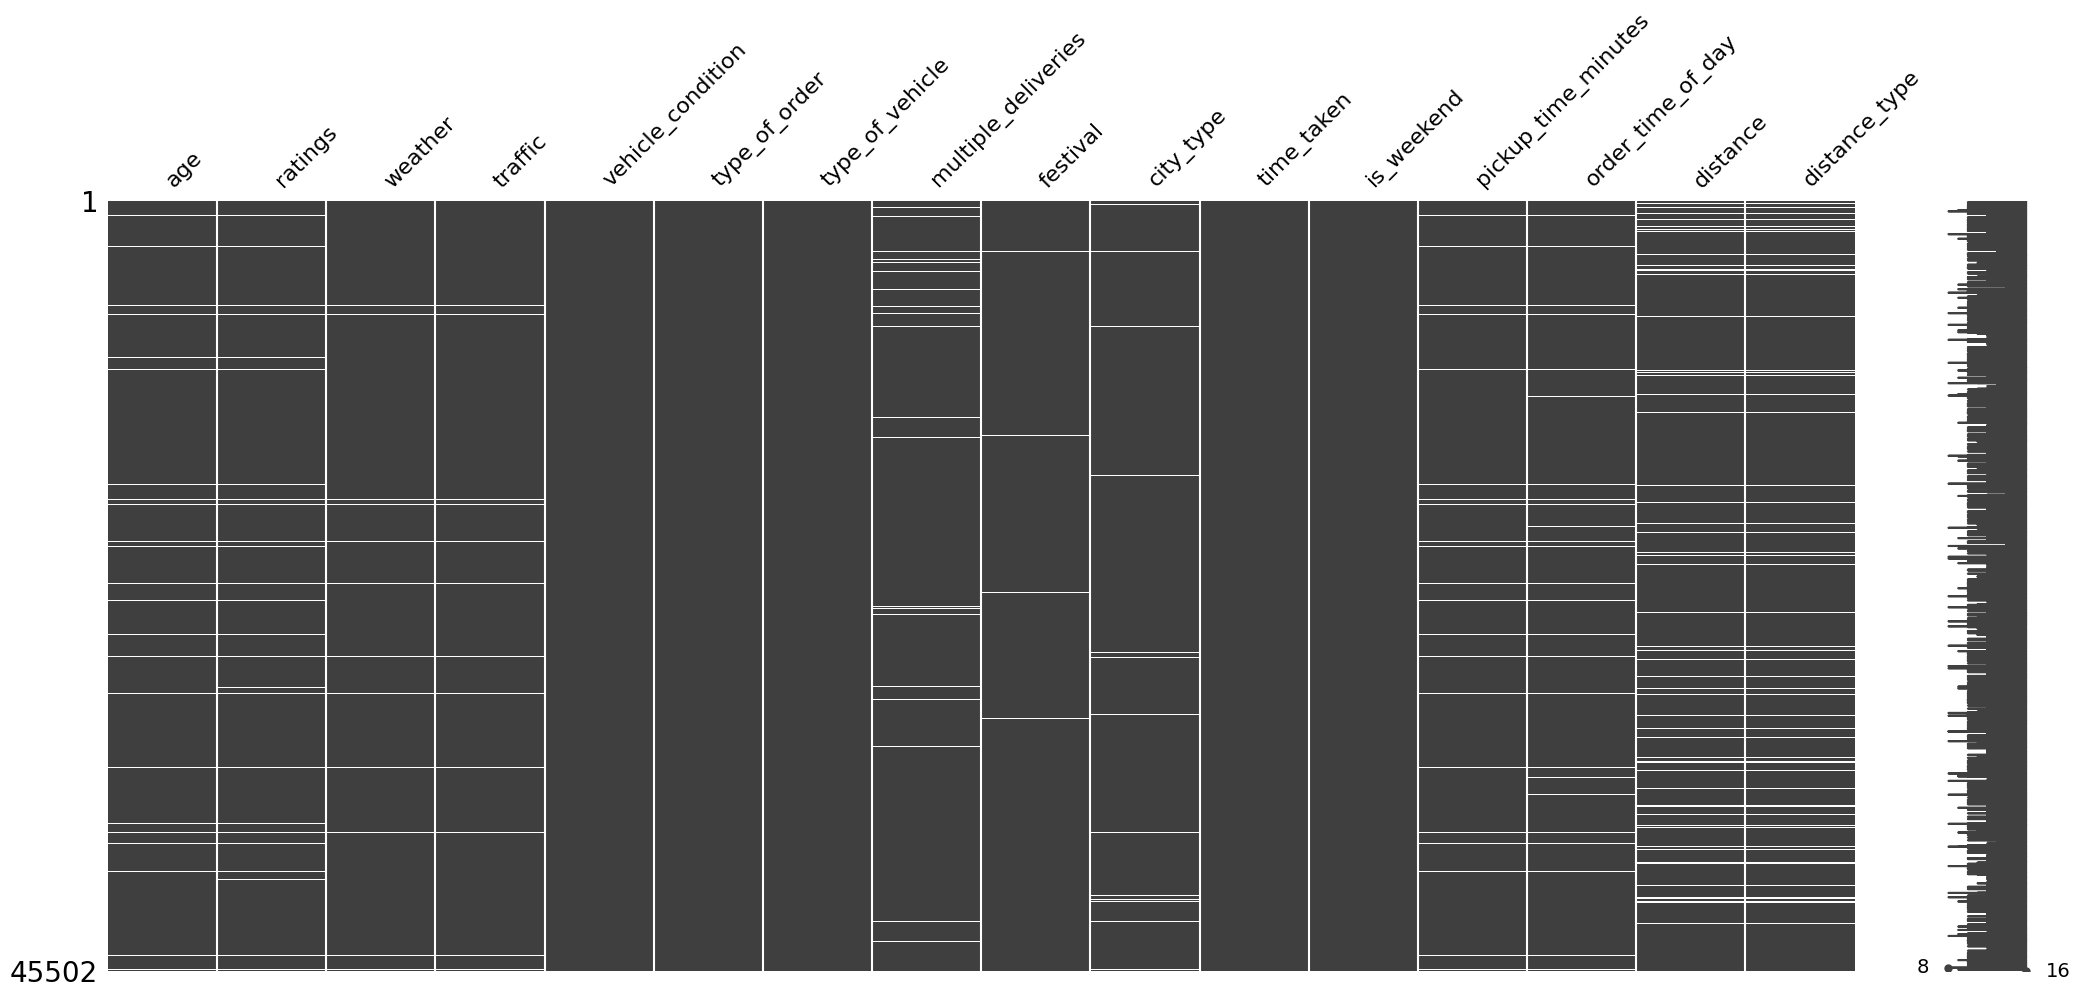

In [64]:
import missingno as msno

msno.matrix(df)

In [65]:
# columns that have missing values

missing_cols = (
                    df
                    .isna()
                    .any(axis=0)
                    .loc[lambda x: x]
                    .index
                )

missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

# Drop Missing values

In [66]:
temp_df = df.copy().dropna()

In [67]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

age  ratings     weather traffic  vehicle_condition type_of_order  \
0      37.0      4.9       sunny    high                  2         snack   
1      34.0      4.5      stormy     jam                  2         snack   
2      23.0      4.4  sandstorms     low                  0        drinks   
3      38.0      4.7       sunny  medium                  0        buffet   
4      32.0      4.6      cloudy    high                  1         snack   
...     ...      ...         ...     ...                ...           ...   
45496  35.0      4.2       windy     jam                  2        drinks   
45497  30.0      4.8       windy    high                  1          meal   
45499  30.0      4.9      cloudy     low                  1        drinks   
45500  20.0      4.7      cloudy    high                  0         snack   
45501  23.0      4.9         fog  medium                  2         snack   

      type_of_vehicle  multiple_deliveries festival      city_type  \
0          motorcycle                  0.0       no          urban   
1             scooter                  1.0       no  metropolitian   
2          motorcycle                  1.0       no          urban   
3          motorcycle                  1.0       no  metropolitian   
4             scooter                  1.0       no  metropolitian   
...               ...                  ...      ...            ...   
45496      motorcycle                  1.0       no  metropolitian   
45497      motorcycle                  0.0       no  metropolitian   
45499         scooter                  0.0       no  metropolitian   
45500      motorcycle                  1.0       no  metropolitian   
45501         scooter                  1.0       no  metropolitian   

       is_weekend  pickup_time_minutes order_time_of_day   distance  \
0               1                 15.0           morning   3.025149   
1               0                  5.0           evening  20.183530   
2               1                 15.0           morning   1.552758   
3               0                 10.0           evening   7.790401   
4               1                 15.0         afternoon   6.210138   
...           ...                  ...               ...        ...   
45496           0                 10.0             night  16.600272   
45497           0                 10.0           morning   1.489846   
45499           0                 15.0             night   4.657195   
45500           0                  5.0         afternoon   6.232393   
45501           0                  5.0         afternoon  12.074396   

      distance_type  
0             short  
1         very_long  
2             short  
3            medium  
4            medium  
...             ...  
45496     very_long  
45497         short  
45499         short  
45500        medium  
45501          long  

[37695 rows x 15 columns]

In [68]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30156, 15)
The shape of test data is (7539, 15)


In [70]:
# missing values in train data

X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [71]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [72]:
missing_cols

Index(['age', 'ratings', 'weather', 'traffic', 'multiple_deliveries',
       'festival', 'city_type', 'pickup_time_minutes', 'order_time_of_day',
       'distance', 'distance_type'],
      dtype='object')

In [73]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)


0.0

# Pre Processing Pipeline

In [74]:
num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather',
                    'type_of_order',
                    'type_of_vehicle',
                    "festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [75]:
nominal_cat_cols

['weather',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'is_weekend',
 'order_time_of_day']

In [76]:
X_train.isna().sum()

age                    0
ratings                0
weather                0
traffic                0
vehicle_condition      0
type_of_order          0
type_of_vehicle        0
multiple_deliveries    0
festival               0
city_type              0
is_weekend             0
pickup_time_minutes    0
order_time_of_day      0
distance               0
distance_type          0
dtype: int64

In [77]:
# # features to fill values with mode

# features_to_fill_mode = ['multiple_deliveries','festival','city_type']
# features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

# features_to_fill_missing

In [78]:
# # simple imputer to fill categorical vars with mode

# simple_imputer = ColumnTransformer(transformers=[
#     ("mode_imputer",SimpleImputer(strategy="most_frequent",add_indicator=True),features_to_fill_mode),
#     ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing",add_indicator=True),features_to_fill_missing)
# ],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

# simple_imputer

In [79]:
# simple_imputer.fit_transform(X_train)

In [80]:
# simple_imputer.fit_transform(X_train).isna().sum()

In [81]:
# knn imputer

# knn_imputer = KNNImputer(n_neighbors=5)

In [82]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [83]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [84]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [85]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather', 'type_of_order', 'type_of_vehicle',
                                  'festival', 'city_type', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [86]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                # ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor)
                                # ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  ['age', 'ratings',
                                                   'pickup_time_minutes',
                                                   'distance']),
                                                 ('nominal_encode',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['weather', 'type_of_order',
                                                   'type_of_vehicle',
                                                   'festival', 'city_type',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False))])

In [87]:
# do data preprocessing

X_train_trans = processing_pipeline.fit_transform(X_train)

X_test_trans = processing_pipeline.transform(X_test)

In [88]:
X_train_trans

age  ratings  pickup_time_minutes  distance  weather_fog  \
8708   0.473684     0.56                  1.0  0.404165          0.0   
25198  1.000000     0.76                  0.0  0.154044          0.0   
34049  0.473684     0.80                  0.5  0.002461          0.0   
25987  1.000000     0.92                  1.0  0.460411          0.0   
37121  0.526316     0.76                  0.5  0.243676          0.0   
...         ...      ...                  ...       ...          ...   
20239  0.578947     0.92                  0.5  0.451895          0.0   
7590   0.052632     1.00                  1.0  0.612270          0.0   
13610  0.526316     0.92                  0.0  0.322877          0.0   
1045   0.947368     0.96                  0.5  0.004486          0.0   
18968  0.684211     0.96                  0.0  0.481978          0.0   

       weather_sandstorms  weather_stormy  weather_sunny  weather_windy  \
8708                  0.0             0.0            1.0            0.0   
25198                 1.0             0.0            0.0            0.0   
34049                 0.0             0.0            1.0            0.0   
25987                 1.0             0.0            0.0            0.0   
37121                 0.0             0.0            0.0            1.0   
...                   ...             ...            ...            ...   
20239                 0.0             0.0            1.0            0.0   
7590                  1.0             0.0            0.0            0.0   
13610                 0.0             0.0            0.0            0.0   
1045                  0.0             0.0            1.0            0.0   
18968                 0.0             0.0            0.0            1.0   

       type_of_order_drinks  ...  city_type_semi-urban  city_type_urban  \
8708                    1.0  ...                   1.0              0.0   
25198                   0.0  ...                   0.0              0.0   
34049                   0.0  ...                   0.0              1.0   
25987                   0.0  ...                   0.0              0.0   
37121                   0.0  ...                   0.0              0.0   
...                     ...  ...                   ...              ...   
20239                   0.0  ...                   0.0              0.0   
7590                    0.0  ...                   0.0              0.0   
13610                   0.0  ...                   0.0              0.0   
1045                    0.0  ...                   0.0              1.0   
18968                   0.0  ...                   0.0              1.0   

       is_weekend_1  order_time_of_day_evening  order_time_of_day_morning  \
8708            0.0                        0.0                        0.0   
25198           1.0                        0.0                        0.0   
34049           0.0                        0.0                        1.0   
25987           1.0                        0.0                        0.0   
37121           1.0                        0.0                        0.0   
...             ...                        ...                        ...   
20239           1.0                        1.0                        0.0   
7590            1.0                        1.0                        0.0   
13610           1.0                        0.0                        0.0   
1045            1.0                        0.0                        1.0   
18968           0.0                        0.0                        0.0   

       order_time_of_day_night  traffic  distance_type  vehicle_condition  \
8708                       1.0      3.0            1.0                  0   
25198                      0.0      1.0            0.0                  0   
34049                      0.0      2.0            0.0                  1   
25987                      1.0      0.0            2.0                  0   
37121                      0.0     

In [89]:
%pip install optuna

In [90]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

In [91]:
from sklearn.metrics import r2_score, mean_absolute_error

In [92]:
def objective(trial):
    with mlflow.start_run(nested=True):
        model_name = trial.suggest_categorical("model",["SVM","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVM":
            kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,10)
                model = SVR(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,5)
                model = SVR(C=c_poly,degree=degree_poly,
                            kernel="poly")

            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,10)
                model = SVR(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,200)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,20)
            model = RandomForestRegressor(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)

        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,200)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingRegressor(n_estimators=n_estimators_gb,
                                                learning_rate=learning_rate_gb,
                                                max_depth=max_depth_gb,
                                                random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,25)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsRegressor(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,200)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,20)
            model = XGBRegressor(n_estimators=n_estimators_xgb,
                                    learning_rate=learning_rate_xgb,
                                    max_depth=max_depth_xgb,
                                    random_state=42,
                                    n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMRegressor(n_estimators=n_estimators_lgbm,
                                    learning_rate=learning_rate_lgbm,
                                    max_depth=max_depth_lgbm,
                                    random_state=42)


        # train the model
        model.fit(X_train_trans,y_train_pt.values.ravel())

        # log model params
        mlflow.log_params(model.get_params())

        # get the predictions
        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)

        # get the actual predictions values
        y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
        y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

        # calculate the error
        error = mean_absolute_error(y_test,y_pred_test_org)

        # log model_name
        mlflow.log_param("model",model_name)

        # log error
        mlflow.log_metric("MAE",error)

        return error

In [93]:
# create optuna study
study = optuna.create_study(direction="minimize",study_name="model_selection")

with mlflow.start_run(run_name="Best Model") as parent:
    # optimize the objective function
    study.optimize(objective,n_trials=30,n_jobs=-1)

    # log the best parameters
    mlflow.log_params(study.best_params)

    # log the best score
    mlflow.log_metric("best_score",study.best_value)

[I 2024-11-29 08:03:58,050] A new study created in memory with name: model_selection


🏃 View run fearless-goose-3 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/fae7fbc2e2f7421697bc79101ca29e6a
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:04:02,375] Trial 0 finished with value: 3.01408118599711 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 122, 'learning_rate_lgbm': 0.18024158746866792, 'max_depth_lgbm': 12}. Best is trial 0 with value: 3.01408118599711.


🏃 View run merciful-stoat-203 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/a6afa6716ff241f18e11ca350291404a
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:04:04,407] Trial 1 finished with value: 3.069600439429707 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 157, 'learning_rate_lgbm': 0.31805509868115595, 'max_depth_lgbm': 16}. Best is trial 0 with value: 3.01408118599711.


🏃 View run overjoyed-loon-793 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/7016216271a5489fb36adf6717424cff
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:04:23,061] Trial 3 finished with value: 3.5297175390654605 and parameters: {'model': 'RF', 'n_estimators_rf': 106, 'max_depth_rf': 8}. Best is trial 0 with value: 3.01408118599711.
[I 2024-11-29 08:04:44,063] Trial 4 finished with value: 3.1622416010142036 and parameters: {'model': 'XGB', 'n_estimators_xgb': 190, 'learning_rate_xgb': 0.19568970075445927, 'max_depth_xgb': 9}. Best is trial 0 with value: 3.01408118599711.


🏃 View run enchanting-owl-191 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/7f4870b6612044308dfbb71d79e61c47
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:09:10,826] Trial 2 finished with value: 4.675430735671015 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 1.0360325432161588}. Best is trial 0 with value: 3.01408118599711.


🏃 View run upbeat-goose-740 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/06c9393d926c4e6280b75233662113a2
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:09:27,670] Trial 6 finished with value: 4.260510322179431 and parameters: {'model': 'KNN', 'n_neighbors_knn': 14, 'weights_knn': 'uniform'}. Best is trial 0 with value: 3.01408118599711.


🏃 View run brawny-mule-10 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/2c758d975730445992f16721921a4da6
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run exultant-mole-747 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/30aabf2b9334479da5e0004874cec4fe
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:09:41,505] Trial 7 finished with value: 3.244352045576584 and parameters: {'model': 'XGB', 'n_estimators_xgb': 110, 'learning_rate_xgb': 0.17124172769890056, 'max_depth_xgb': 15}. Best is trial 0 with value: 3.01408118599711.


🏃 View run skillful-quail-653 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/bf5264099a6e4cfda47eb53c3e6af914
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:22:37,988] Trial 8 finished with value: 4.675484478963796 and parameters: {'model': 'SVM', 'kernel_svm': 'linear', 'c_linear': 6.6515581043012855}. Best is trial 0 with value: 3.01408118599711.
[I 2024-11-29 08:22:39,847] Trial 9 finished with value: 3.095343632539303 and parameters: {'model': 'XGB', 'n_estimators_xgb': 41, 'learning_rate_xgb': 0.34516469267131067, 'max_depth_xgb': 8}. Best is trial 0 with value: 3.01408118599711.


🏃 View run nervous-pug-352 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/06084f8a068041c4ac1e37850bdf84e8
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:37:12,369] Trial 10 finished with value: 6.58995373468824 and parameters: {'model': 'SVM', 'kernel_svm': 'rbf', 'c_rbf': 15.321192035732512, 'gamma_rbf': 8.948566707578271}. Best is trial 0 with value: 3.01408118599711.


🏃 View run gifted-whale-559 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/b15b0e9d737c44fd8c98f7ae4382f305
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:37:14,214] Trial 11 finished with value: 3.2229997857523345 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 58, 'learning_rate_lgbm': 0.10385536823492203, 'max_depth_lgbm': 5}. Best is trial 0 with value: 3.01408118599711.


🏃 View run sincere-cod-250 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/6601f6f44d034aed818033c8301e9d58
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run judicious-crane-703 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/a96b3ea623984bccad97f4e1f9487375
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:37:16,817] Trial 12 finished with value: 3.068363268396702 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 166, 'learning_rate_lgbm': 0.3292470764199522, 'max_depth_lgbm': 17}. Best is trial 0 with value: 3.01408118599711.


🏃 View run fortunate-crab-74 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/19e7395157484af5a72e3fb723c79f3f
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:37:22,813] Trial 13 finished with value: 3.0496472768227023 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 162, 'learning_rate_lgbm': 0.21671962327516675, 'max_depth_lgbm': 18}. Best is trial 0 with value: 3.01408118599711.
[I 2024-11-29 08:38:15,409] Trial 14 finished with value: 4.252790133653756 and parameters: {'model': 'GB', 'n_estimators_gb': 185, 'learning_rate_gb': 0.9837467363665423, 'max_depth_gb': 12}. Best is trial 0 with value: 3.01408118599711.


🏃 View run chill-lamb-185 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/f1e695077bcd4972a83b9dc985eab393
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:38:17,605] Trial 15 finished with value: 3.035558831673392 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 107, 'learning_rate_lgbm': 0.14327165356357854, 'max_depth_lgbm': 10}. Best is trial 0 with value: 3.01408118599711.


🏃 View run beautiful-toad-510 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/09058b2307184992ba03d0e7c3ef6db9
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:38:20,401] Trial 16 finished with value: 3.053886019535342 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 89, 'learning_rate_lgbm': 0.13649638023281008, 'max_depth_lgbm': 9}. Best is trial 0 with value: 3.01408118599711.


🏃 View run selective-elk-975 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/728e6165adc3418f91feb5d41f2f4df4
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run redolent-loon-364 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/c7488ad18ae0498ba9f4eefecce9af3c
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:38:25,961] Trial 17 finished with value: 6.599217762636962 and parameters: {'model': 'GB', 'n_estimators_gb': 10, 'learning_rate_gb': 0.04322200881023197, 'max_depth_gb': 2}. Best is trial 0 with value: 3.01408118599711.


🏃 View run intelligent-gnu-418 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/afdc8fd16d304aaf8d56b92c7e84c75c
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:39:10,822] Trial 18 finished with value: 3.0771692846368337 and parameters: {'model': 'RF', 'n_estimators_rf': 189, 'max_depth_rf': 19}. Best is trial 0 with value: 3.01408118599711.
[I 2024-11-29 08:39:29,105] Trial 19 finished with value: 5.3131715081575805 and parameters: {'model': 'KNN', 'n_neighbors_knn': 1, 'weights_knn': 'distance'}. Best is trial 0 with value: 3.01408118599711.


🏃 View run youthful-conch-793 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/159b4462e38347e18112b6be9d005d03
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run intrigued-bird-174 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/c8f80fe9299a407a88844c5122755608
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:39:31,740] Trial 20 finished with value: 3.1410291348286004 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 107, 'learning_rate_lgbm': 0.4494870872950383, 'max_depth_lgbm': 11}. Best is trial 0 with value: 3.01408118599711.
[I 2024-11-29 08:39:33,823] Trial 21 finished with value: 3.047394735867286 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 113, 'learning_rate_lgbm': 0.208428260156246, 'max_depth_lgbm': 7}. Best is trial 0 with value: 3.01408118599711.


🏃 View run dazzling-goose-94 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/9e51952f037d4bf7a6948b1a6775be3f
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run lyrical-toad-68 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/cf157368da6a43179b50cb4ba4b019a5
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:39:39,570] Trial 22 finished with value: 3.064159045891316 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 117, 'learning_rate_lgbm': 0.2034211289898202, 'max_depth_lgbm': 7}. Best is trial 0 with value: 3.01408118599711.


🏃 View run whimsical-sheep-391 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/ade45770954b481eb40007baf4fb7818
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:39:45,579] Trial 23 finished with value: 3.0611852244422093 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 121, 'learning_rate_lgbm': 0.20952238417211771, 'max_depth_lgbm': 13}. Best is trial 0 with value: 3.01408118599711.


🏃 View run gifted-gnu-577 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/f4c27e4a70654d30ad7e3ca97042ee39
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:39:51,600] Trial 24 finished with value: 3.4430710965322024 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 74, 'learning_rate_lgbm': 0.17626166244455851, 'max_depth_lgbm': 3}. Best is trial 0 with value: 3.01408118599711.


🏃 View run unequaled-turtle-367 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/5a79ecfd29544c2e9fa800f8d5d01370
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:39:57,609] Trial 25 finished with value: 3.0515180124649435 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 131, 'learning_rate_lgbm': 0.2577228275767568, 'max_depth_lgbm': 12}. Best is trial 0 with value: 3.01408118599711.


🏃 View run shivering-bear-804 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/0c6349892e87483ba2dc7a4f96ab2961
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:40:03,575] Trial 26 finished with value: 3.711440052298197 and parameters: {'model': 'LGBM', 'n_estimators_lgbm': 11, 'learning_rate_lgbm': 0.14830836917885887, 'max_depth_lgbm': 8}. Best is trial 0 with value: 3.01408118599711.


🏃 View run useful-hen-320 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/9daec58d59004564a8f19a5651df20ac
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:40:37,390] Trial 27 finished with value: 3.687239840500231 and parameters: {'model': 'GB', 'n_estimators_gb': 70, 'learning_rate_gb': 0.5113686821938784, 'max_depth_gb': 20}. Best is trial 0 with value: 3.01408118599711.


🏃 View run bold-cat-141 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/d00493091a21473d9f52f904d3f0c1f9
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


[I 2024-11-29 08:40:39,036] Trial 28 finished with value: 5.864892408110797 and parameters: {'model': 'RF', 'n_estimators_rf': 14, 'max_depth_rf': 2}. Best is trial 0 with value: 3.01408118599711.
[I 2024-11-29 08:40:56,594] Trial 29 finished with value: 4.313473738754308 and parameters: {'model': 'KNN', 'n_neighbors_knn': 25, 'weights_knn': 'uniform'}. Best is trial 0 with value: 3.01408118599711.


🏃 View run bright-yak-521 at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/ddf0ba56722d4c18ac5465f8e50aeb82
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1
🏃 View run Best Model at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1/runs/d1a597c894cd4084b0cff98c08818389
🧪 View experiment at: https://dagshub.com/himanshu1703/swiggy-delivery-time-prediction.mlflow/#/experiments/1


KeyboardInterrupt: 

In [95]:
# best score

study.best_value

3.01408118599711

In [97]:
lgbm_params = {
    "n_estimators": 145,
    "learning_rate": 0.16632111599858262,
    "max_depth": 17
}

In [98]:
# train the model on best parameters

lgbm = LGBMRegressor(**lgbm_params)

lgbm.fit(X_train_trans,y_train_pt.values.ravel())

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 352
[LightGBM] [Info] Number of data points in the train set: 30156, number of used features: 25
[LightGBM] [Info] Start training from score -0.000000


LGBMRegressor(learning_rate=0.16632111599858262, max_depth=17, n_estimators=145)

In [99]:
# get the predictions
y_pred_train = lgbm.predict(X_train_trans)
y_pred_test = lgbm.predict(X_test_trans)

In [100]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [101]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 2.78 minutes
The test error is 3.02 minutes


In [102]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.86
The test r2 score is 0.84


In [103]:
# dataframe of results

study.trials_dataframe()

number     value             datetime_start          datetime_complete  \
0        0  3.014081 2024-11-29 08:03:58.250867 2024-11-29 08:04:02.374741   
1        1  3.069600 2024-11-29 08:03:58.259699 2024-11-29 08:04:04.406489   
2        2  4.675431 2024-11-29 08:04:02.384515 2024-11-29 08:09:10.825547   
3        3  3.529718 2024-11-29 08:04:04.415851 2024-11-29 08:04:23.054133   
4        4  3.162242 2024-11-29 08:04:23.073791 2024-11-29 08:04:44.063272   
5        5       NaN 2024-11-29 08:04:44.067225                        NaT   
6        6  4.260510 2024-11-29 08:09:10.833935 2024-11-29 08:09:27.670143   
7        7  3.244352 2024-11-29 08:09:27.676236 2024-11-29 08:09:41.504580   
8        8  4.675484 2024-11-29 08:09:41.512812 2024-11-29 08:22:37.988229   
9        9  3.095344 2024-11-29 08:22:37.995466 2024-11-29 08:22:39.846785   
10      10  6.589954 2024-11-29 08:22:39.858371 2024-11-29 08:37:12.368592   
11      11  3.223000 2024-11-29 08:37:12.381408 2024-11-29 08:37:14.214018   
12      12  3.068363 2024-11-29 08:37:14.223138 2024-11-29 08:37:16.816832   
13      13  3.049647 2024-11-29 08:37:16.825065 2024-11-29 08:37:22.812516   
14      14  4.252790 2024-11-29 08:37:22.819976 2024-11-29 08:38:15.409167   
15      15  3.035559 2024-11-29 08:38:15.418541 2024-11-29 08:38:17.605364   
16      16  3.053886 2024-11-29 08:38:17.612218 2024-11-29 08:38:20.400607   
17      17  6.599218 2024-11-29 08:38:20.405055 2024-11-29 08:38:25.961007   
18      18  3.077169 2024-11-29 08:38:25.973171 2024-11-29 08:39:10.821989   
19      19  5.313172 2024-11-29 08:39:10.832781 2024-11-29 08:39:29.104583   
20      20  3.141029 2024-11-29 08:39:29.112992 2024-11-29 08:39:31.740304   
21      21  3.047395 2024-11-29 08:39:31.747155 2024-11-29 08:39:33.822775   
22      22  3.064159 2024-11-29 08:39:33.830880 2024-11-29 08:39:39.569880   
23      23  3.061185 2024-11-29 08:39:39.577903 2024-11-29 08:39:45.578567   
24      24  3.443071 2024-11-29 08:39:45.583124 2024-11-29 08:39:51.600367   
25      25  3.051518 2024-11-29 08:39:51.608085 2024-11-29 08:39:57.609378   
26      26  3.711440 2024-11-29 08:39:57.614941 2024-11-29 08:40:03.574980   
27      27  3.687240 2024-11-29 08:40:03.582286 2024-11-29 08:40:37.390307   
28      28  5.864892 2024-11-29 08:40:37.400418 2024-11-29 08:40:39.036225   
29      29  4.313474 2024-11-29 08:40:39.045571 2024-11-29 08:40:56.593865   

                 duration  params_c_linear  params_c_poly  params_c_rbf  \
0  0 days 00:00:04.123874              NaN            NaN           NaN   
1  0 days 00:00:06.146790              NaN            NaN           NaN   
2  0 days 00:05:08.441032         1.036033            NaN           NaN   
3  0 days 00:00:18.638282              NaN            NaN           NaN   
4  0 days 00:00:20.989481              NaN            NaN           NaN   
5                     NaT              NaN       6.782753           NaN   
6  0 days 00:00:16.836208              NaN            NaN           NaN   
7  0 days 00:00:13.828344              NaN            NaN           NaN   
8  0 days 00:12:56.475417         6.651558            NaN           NaN   
9  0 days 00:00:01.851319              NaN            NaN           NaN   
10 0 days 00:14:32.510221              NaN            NaN     15.321192   
11 0 days 00:00:01.832610              NaN            NaN           NaN   
12 0 days 00:00:02.593694              NaN            NaN           NaN   
13 0 days 00:00:05.987451              NaN            NaN           NaN   
14 0 days 00:00:52.589191              NaN            NaN           NaN   
15 0 days 00:00:02.186823              NaN            NaN           NaN   
16 0 days 00:00:02.788389              NaN            NaN           NaN   
17 0 days 00:00:05.555952              NaN            NaN           NaN   
18 0 days 00:00:44.848818              NaN            NaN           NaN   
19 0 days 00:00:18.271802              NaN            NaN           NaN   
20 0 days 

In [104]:
# model frequency

study.trials_dataframe()['params_model'].value_counts()

params_model
LGBM    14
SVM      4
RF       3
XGB      3
KNN      3
GB       3
Name: count, dtype: int64

In [105]:
# avg scores for all tested models

study.trials_dataframe().groupby("params_model")['value'].mean().sort_values()

params_model
LGBM    3.145281
XGB     3.167312
RF      4.157260
KNN     4.629052
GB      4.846416
SVM     5.313623
Name: value, dtype: float64

In [106]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=lgbm,
                                    transformer=pt)

In [107]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)

scores

array([-3.06435673, -3.04327813, -3.0700516 , -3.06852842, -3.05699881])

In [108]:
# mean score

- scores.mean()

3.060642738191347

In [109]:
# optimization history plot

optuna.visualization.plot_optimization_history(study)

In [110]:
# partial coord plot

optuna.visualization.plot_parallel_coordinate(study,params=["model"])